# Visualizing Fire Scars with False Color 

In [1]:
# load in libraries 

import os

import numpy as np
import matplotlib.pyplot as plt

import geopandas as gpd
from shapely.geometry import Polygon

import rioxarray as rioxr
import xarray as xr

## True Color Image

Construct a file path to the Landsat data using os and import it using rioxr.open_rasterio()

In [7]:
root = os.path.join('/',
                  'courses',
                  'EDS220',
                  'data',
                  'hwk4_landsat_data')

fp = os.path.join(root,
                 'landsat8-2018-01-26-sb-simplified.nc')

landsat = rioxr.open_rasterio(fp)



Explore the data and write a brief summary of the information you obtained from the preliminary information. Your summary should include the a description of the data’s variables and dimensions.

In [8]:
landsat

<xarray.Dataset> Size: 25MB
Dimensions:      (band: 1, x: 870, y: 731)
Coordinates:
  * band         (band) int64 8B 1
  * x            (x) float64 7kB 1.213e+05 1.216e+05 ... 3.557e+05 3.559e+05
  * y            (y) float64 6kB 3.952e+06 3.952e+06 ... 3.756e+06 3.755e+06
    spatial_ref  int64 8B 0
Data variables:
    red          (band, y, x) float64 5MB ...
    green        (band, y, x) float64 5MB ...
    blue         (band, y, x) float64 5MB ...
    nir08        (band, y, x) float64 5MB ...
    swir22       (band, y, x) float64 5MB ...

Because this data is an xarray, we can simply call `landsat` to see information about it. Its dimensions are x:870, y:731, which one band. The data variables are red, green, blue, nir08, swir22

In [9]:
# Drop band dimensions

landsat = landsat.squeeze()
print(landsat.dims, landsat.coords,'\n')

# Remove coordinates associated to band
landsat = landsat.drop_vars('band')
print(landsat.dims, landsat.coords)

FrozenMappingWarningOnValuesAccess({'x': 870, 'y': 731}) Coordinates:
    band         int64 8B 1
  * x            (x) float64 7kB 1.213e+05 1.216e+05 ... 3.557e+05 3.559e+05
  * y            (y) float64 6kB 3.952e+06 3.952e+06 ... 3.756e+06 3.755e+06
    spatial_ref  int64 8B 0 

FrozenMappingWarningOnValuesAccess({'x': 870, 'y': 731}) Coordinates:
  * x            (x) float64 7kB 1.213e+05 1.216e+05 ... 3.557e+05 3.559e+05
  * y            (y) float64 6kB 3.952e+06 3.952e+06 ... 3.756e+06 3.755e+06
    spatial_ref  int64 8B 0


Without creating any new variables:

- select the red, green, and blue variables (in that order) of the xarray.Dataset holding the Landsat data,
- convert it to a numpy.array using the to_array() method, and then
- use .plot.imshow() to create an RGB image with the data. There will be a warning, that’s ok.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


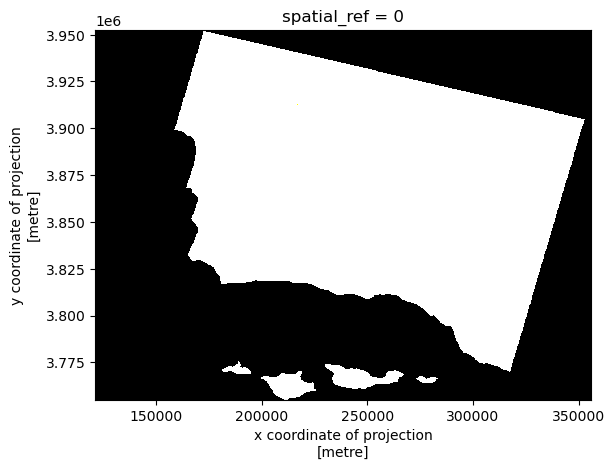

In [12]:
landsat[["red", "green", "blue"]].to_array().plot.imshow()

Adjust the scale used for plotting the bands to get a true color image. HINT: Check the robust parameter. The issue here is the clouds: their RGB values are outliers and cause the other values to be squished when plotting.

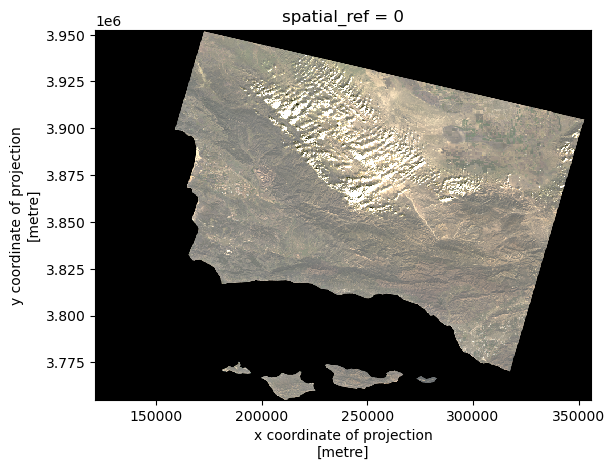

In [15]:
landsat[["red", "green", "blue"]].to_array().plot.imshow(robust = True)

In part d, our output was only in black and white. But from our data exploration, we know that there are color variables. So we have to add `robust = True` to the `.imshow()` in order to actually see the color imagery, as we did in part e.

## False color image

Without creating any new variables, create a false color image by plotting the short-wave infrared (swir22), near-infrared, and red variables (in that order).

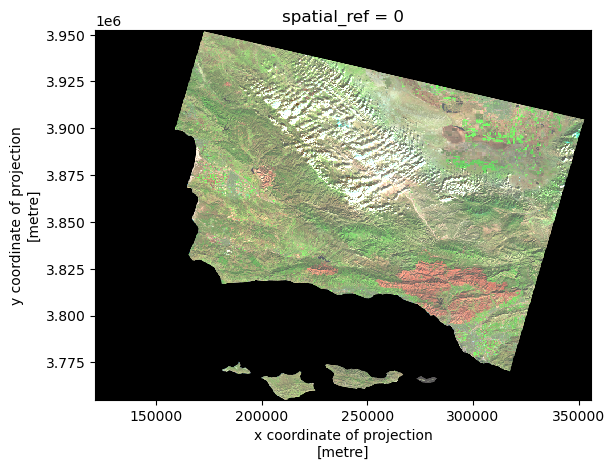

In [16]:
landsat[["swir22", "nir08", "red"]].to_array().plot.imshow(robust = True)

## Map
Create a map showing the shortwave infrared/near-infrared/red false color image together with the Thomas Fire perimeter. Customize it appropriately including, at least, an informative title and legend.

Write a figure description for the map including a brief explanation of how false color imagery is being used.

In [17]:
# Examine CRss
print('thomas_fire CRS: ', thomas_fire.crs)
print('landsat CRS: ', landsat.rio.crs)

thomas_fire CRS:  EPSG:3857
landsat CRS:  EPSG:32611


In [21]:
# Reproject thomas_fire to landsat crs
thomas_fire = thomas_fire.to_crs(landsat.rio.crs)
print('Matched CRS?',  thomas_fire.crs == landsat.rio.crs)

Matched CRS? True


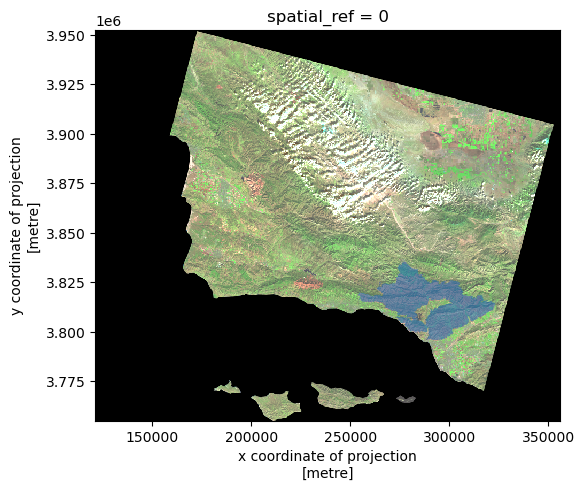

In [23]:
# set aspect ratio
landsat_aspect_ratio = landsat.rio.width / landsat.rio.height

# plot together
fig, ax = plt.subplots(figsize=(6, 6 * landsat_aspect_ratio))  
landsat[["swir22", "nir08", "red"]].to_array().plot.imshow(robust = True, ax=ax)
thomas_fire.plot(ax=ax, alpha=0.6)
plt.show()

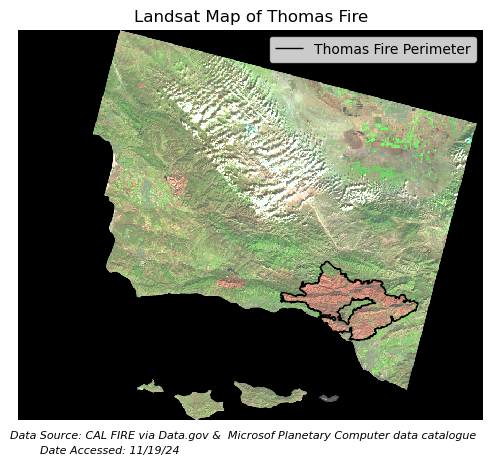

In [77]:
# plot together
fig, ax = plt.subplots(figsize=(6, 6 * landsat_aspect_ratio))  
landsat[["swir22", "nir08", "red"]].to_array().plot.imshow(robust = True, ax=ax)
thomas_fire.boundary.plot(ax=ax, linewidth=1, edgecolor='black', label = "Thomas Fire Perimeter")

ax.set_axis_off()
ax.set_title('Landsat Map of Thomas Fire')
fig.text(0.5, 0.2,
         'Data Source: CAL FIRE via Data.gov &  Microsof Planetary Computer data catalogue',
         ha='center', va='center', fontsize=8, color='black', fontstyle='italic')
fig.text(0.395, 0.18,
         'Date Accessed: 11/19/24',
         ha='right', va='center', fontsize=8, color='black', fontstyle='italic')
ax.legend(loc='upper right')
plt.show()

In [24]:
# Clip data
landsat_small = landsat.rio.clip_box(*thomas_fire.total_bounds)

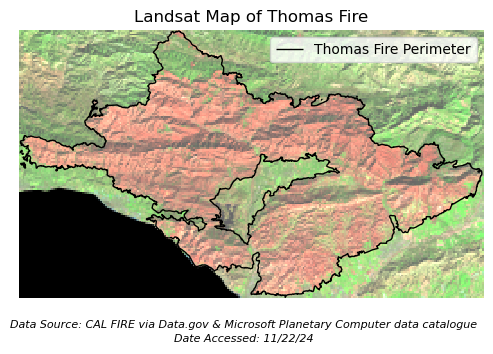

In [69]:
# plot clipped data
fig, ax = plt.subplots(figsize=(6, 6 * landsat_aspect_ratio))  
landsat_small[["swir22", "nir08", "red"]].to_array().plot.imshow(robust = True, ax=ax)
thomas_fire.boundary.plot(ax=ax, linewidth=1, edgecolor='black', label = "Thomas Fire Perimeter")

ax.set_axis_off()
ax.set_title('Landsat Map of Thomas Fire')
fig.text(0.5, 0.27, 'Data Source: CAL FIRE via Data.gov & Microsoft Planetary Computer data catalogue', ha='center', va='center', fontsize=8, color='black', fontstyle='italic') 
fig.text(0.5, 0.25, 'Date Accessed: 11/22/24', ha='center', va='center', fontsize=8, color='black', fontstyle='italic')
ax.legend(loc='upper right')
plt.show()

False color imagery is being used to show the scar from the 2017 Thomas Fire. We can see that the color is significantly different inside the Thomas Fire Perimeter. The difference in color indicates a difference in vegetation (ie. dead vs alive) which more easily shows us the effects of the Thomas Fire than a true color image would